 Assigngment 2 - Employee Churn Analysis using MLP

In [3]:
# Import libraries
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import system
from sklearn.preprocessing import OrdinalEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

Load and Explore the Dataset

In [4]:
# Load dataset
data=pd.read_csv('HR_comma_sep.csv')

In [4]:
# Data description
print(data.head())
print(data.info())
print(data.describe(include ='all'))

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Departments  \
0                   3              0     1                      0       sales   
1                   6              0     1                      0       sales   
2                   4              0     1                      0       sales   
3                   5              0     1                      0       sales   
4                   3              0     1                      0       sales   

   salary  
0     low  
1  mediu

In [5]:
# Check for missing values
print(data.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64


In [6]:
# Percentage of employee who left or not
left_rate = data.left.value_counts() / 14999
print(left_rate)

left
0    0.761917
1    0.238083
Name: count, dtype: float64


Visualize the Data

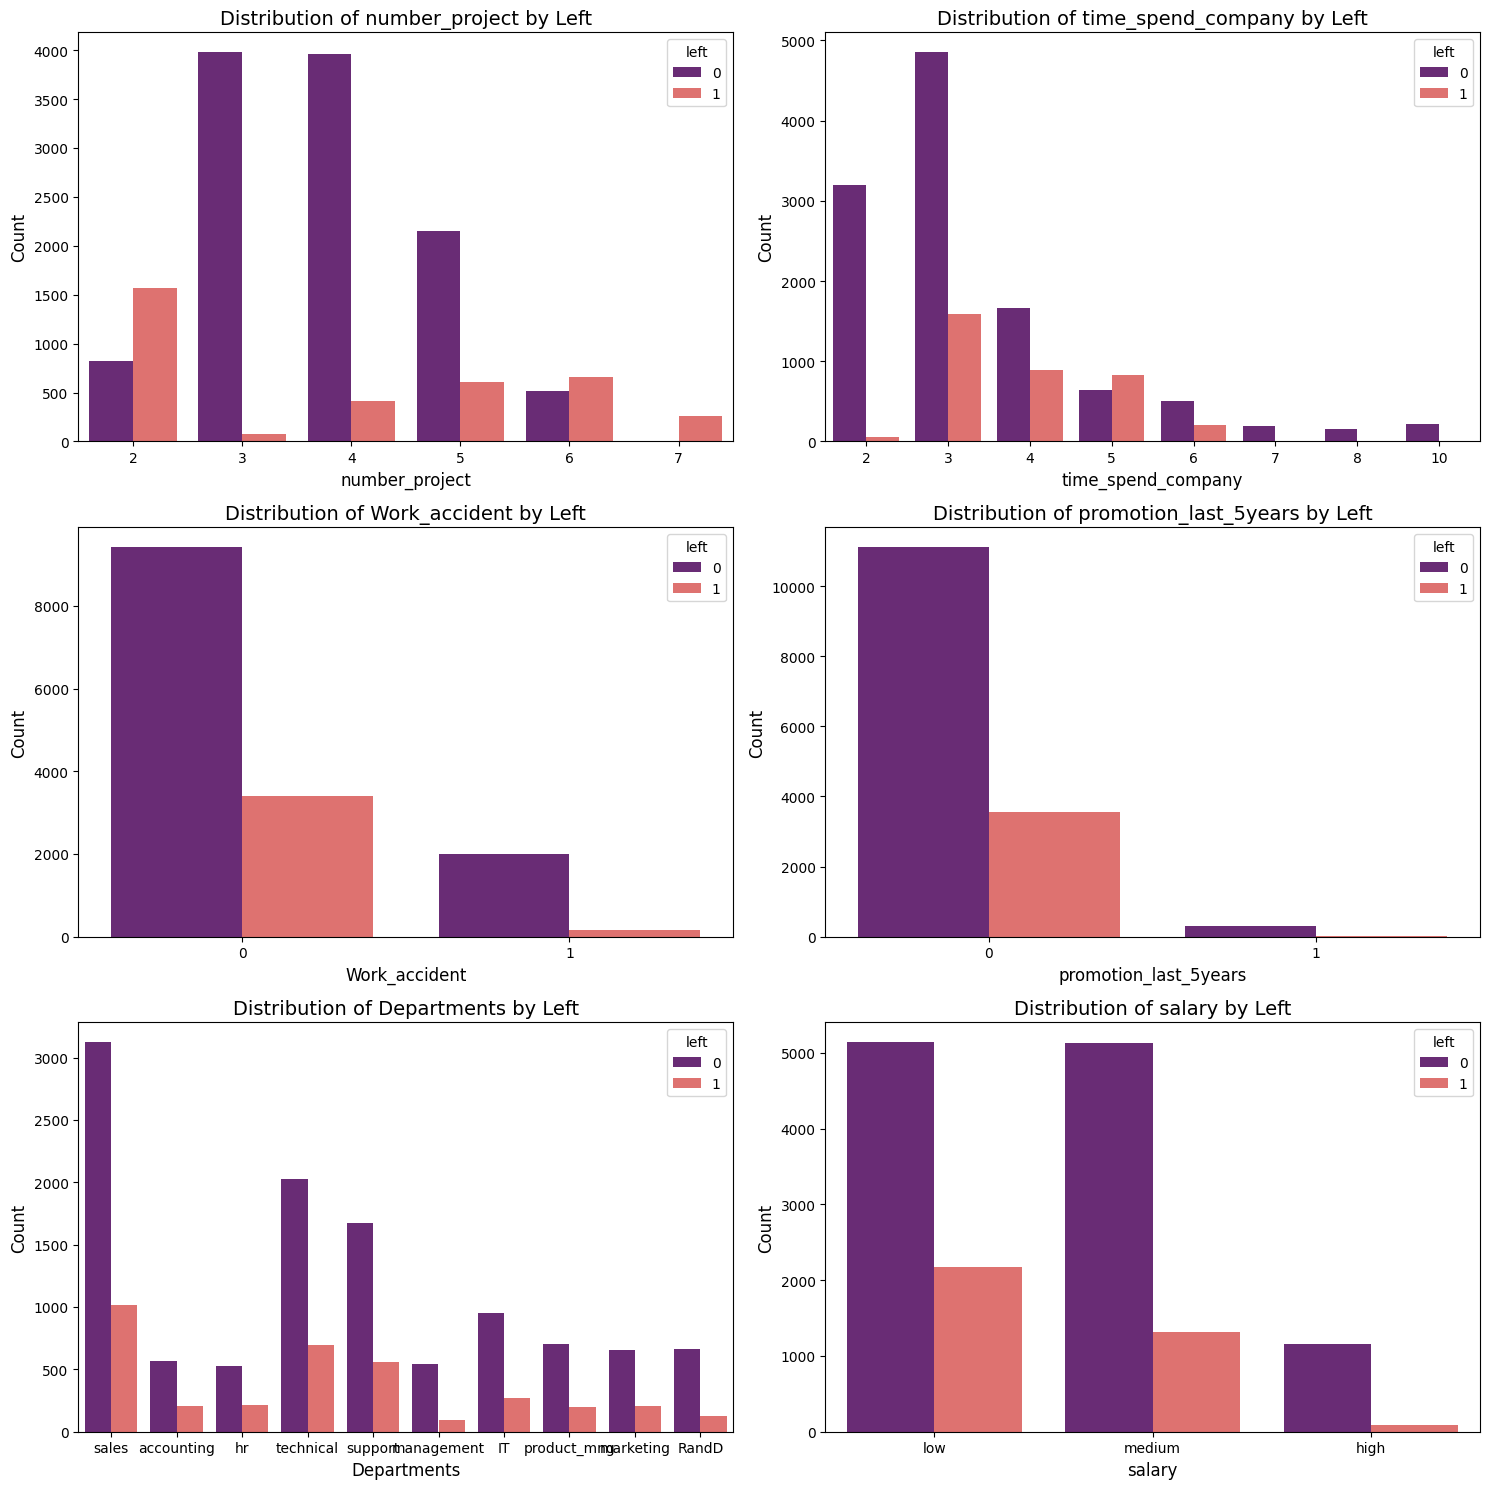

In [7]:
# Distribution using Count plots for 6 categorical features

features = ['number_project', 'time_spend_company', 'Work_accident', 
            'promotion_last_5years', 'Departments', 'salary']

n_features = len(features)
n_rows = (n_features + 1) // 2
n_cols = 2 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5)) 
axes = axes.flatten() 

for i, feature in enumerate(features):
    sns.countplot(x=feature, hue="left", data=data, palette="magma", ax=axes[i], dodge=True)
    axes[i].set_title(f"Distribution of {feature} by Left", fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()

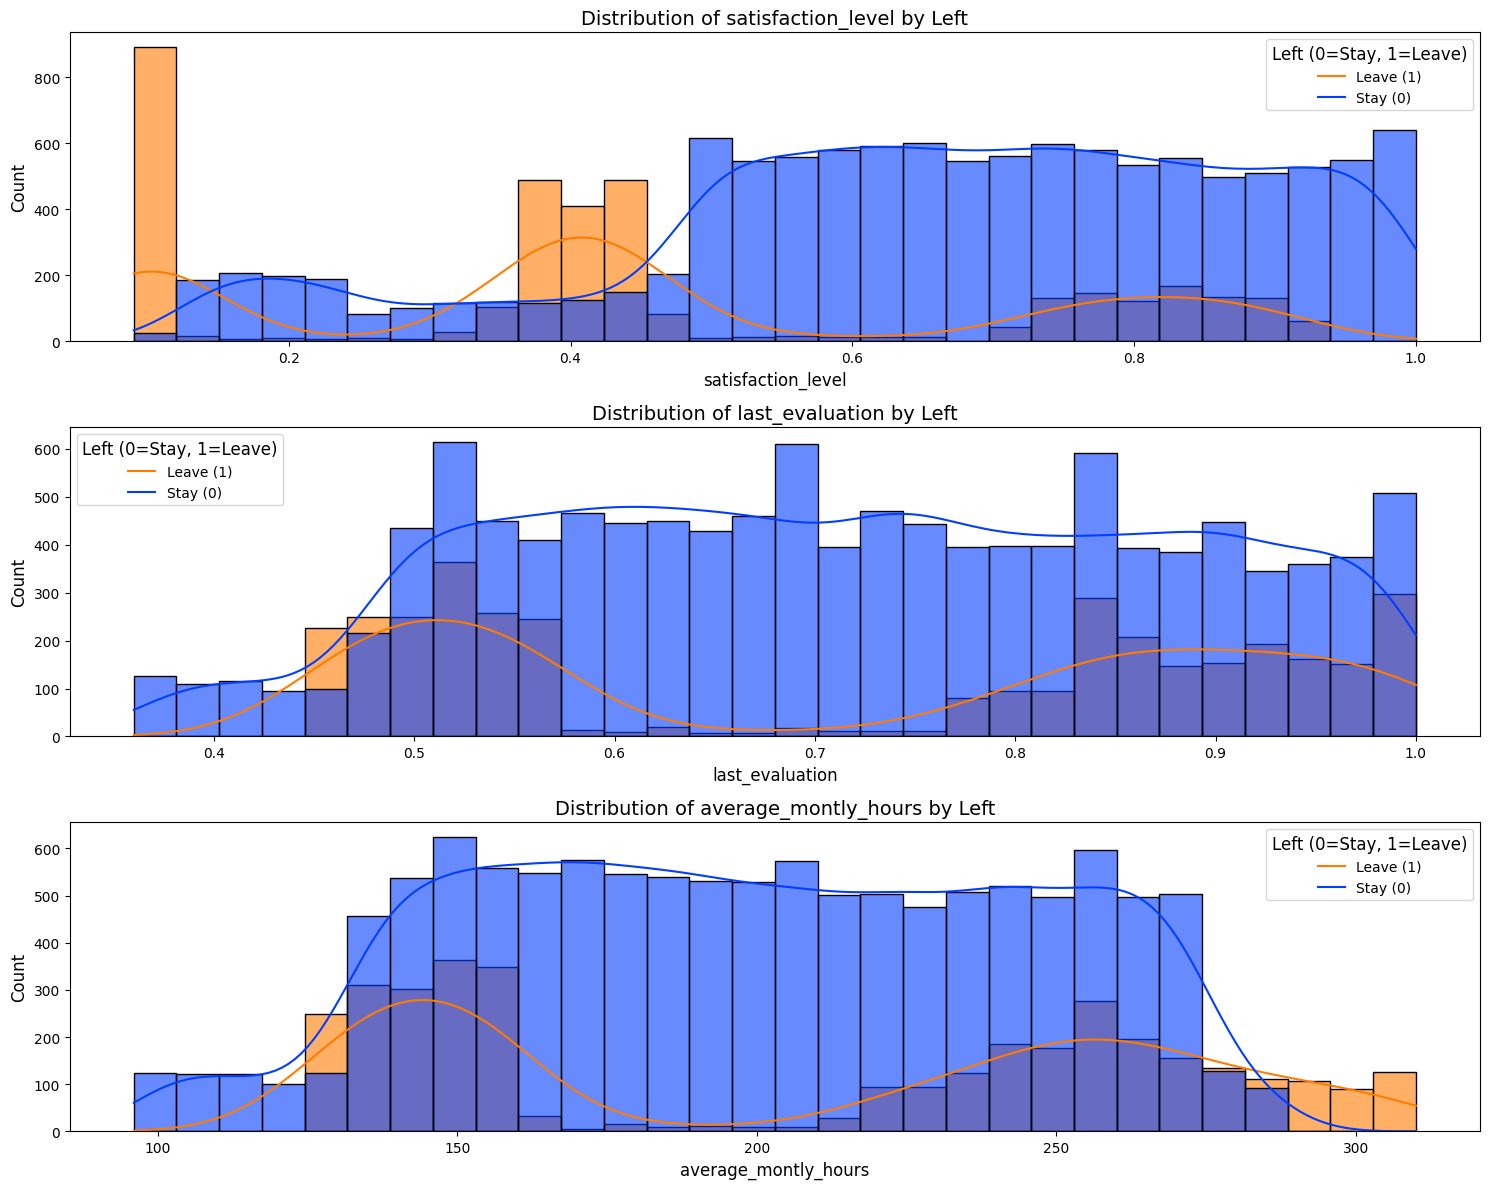

In [8]:
# Feature Distribution using Histogram plots for 3 continuous features
continuous_features=['satisfaction_level', 'last_evaluation', 'average_montly_hours']

plt.figure(figsize=(15, 12))
for i, column in enumerate(continuous_features, 1):
    plt.subplot(3, 1, i) 
    sns.histplot(
        x=column,
        hue="left",
        data=data,
        kde=True,
        bins=30,
        palette="bright",
        alpha=0.6
    )
    plt.title(f'Distribution of {column} by Left', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    plt.legend(labels=[ 'Leave (1)', 'Stay (0)'], title='Left (0=Stay, 1=Leave)', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()

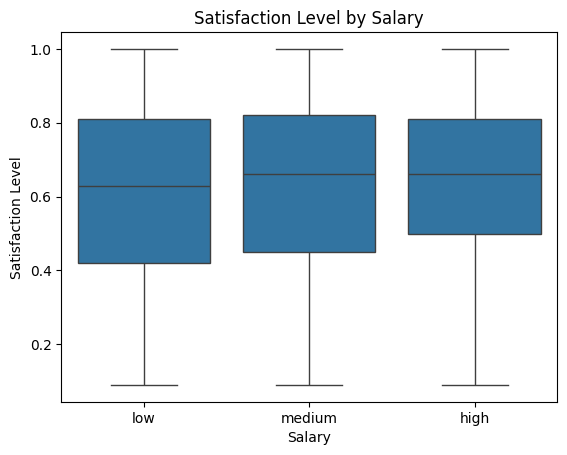

In [9]:
# Box Plot for salary vs. satisfaction level
sns.boxplot(x='salary', y='satisfaction_level', data=data)
plt.title('Satisfaction Level by Salary')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')
plt.show()

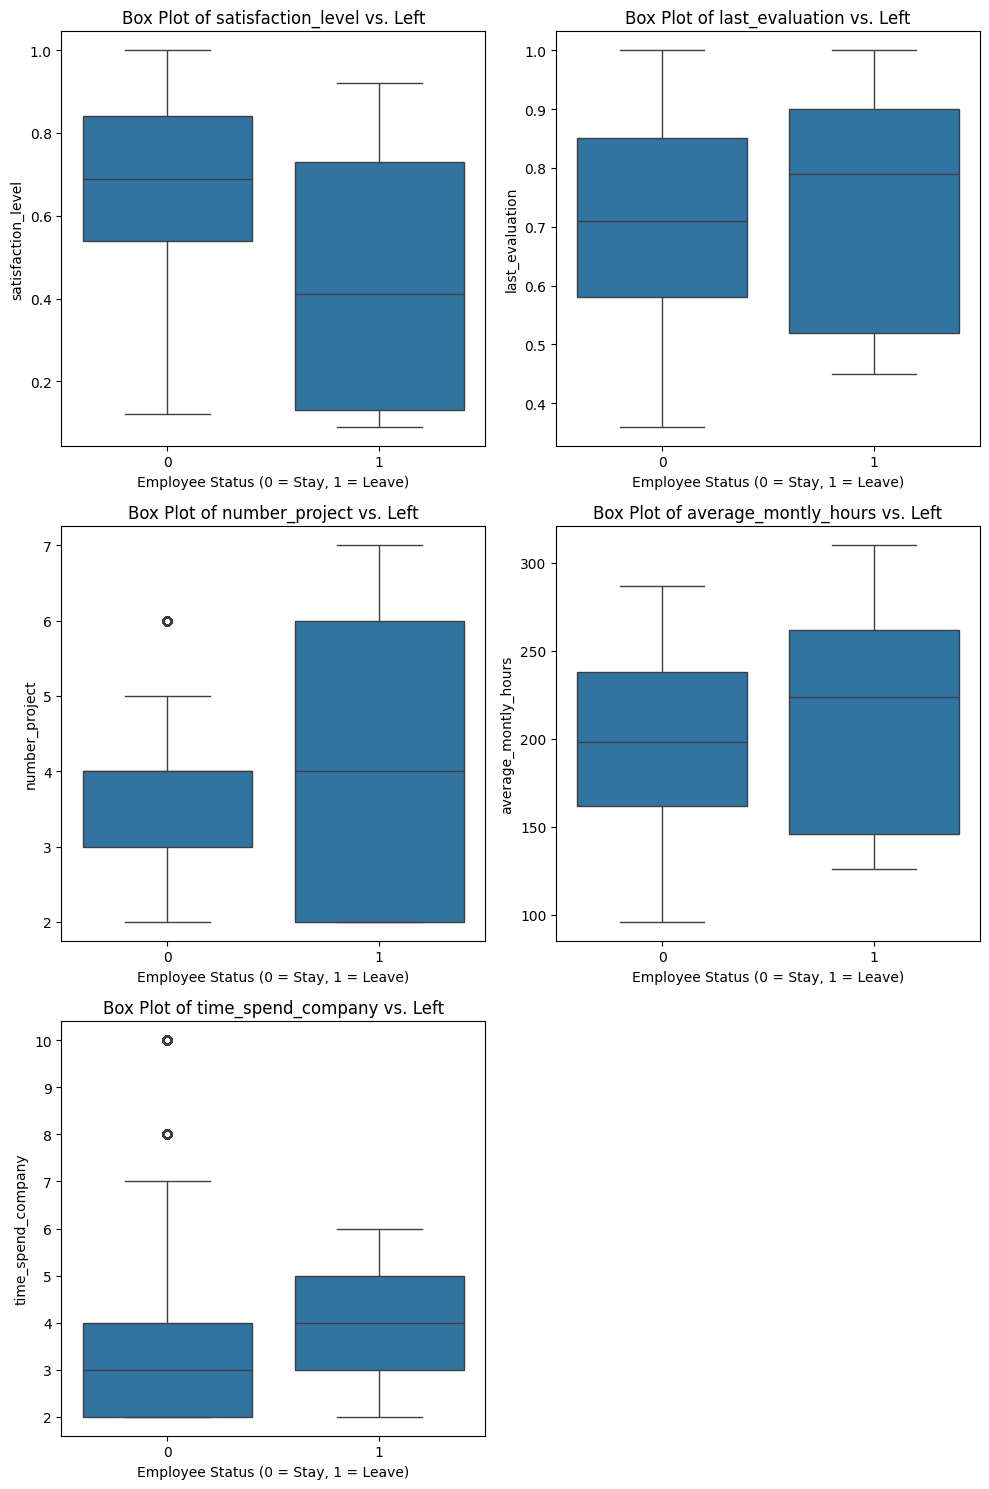

In [10]:
# Box plot of numerical features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company']

plt.figure(figsize=(10, 15))
for i, feature in enumerate(numerical_features, 1): 
    plt.subplot(3, 2, i) 
    sns.boxplot(x='left', y=feature, data=data)
    plt.title(f'Box Plot of {feature} vs. Left')
    plt.xlabel('Employee Status (0 = Stay, 1 = Leave)')
    plt.ylabel(feature)
    plt.tight_layout() 

plt.show()

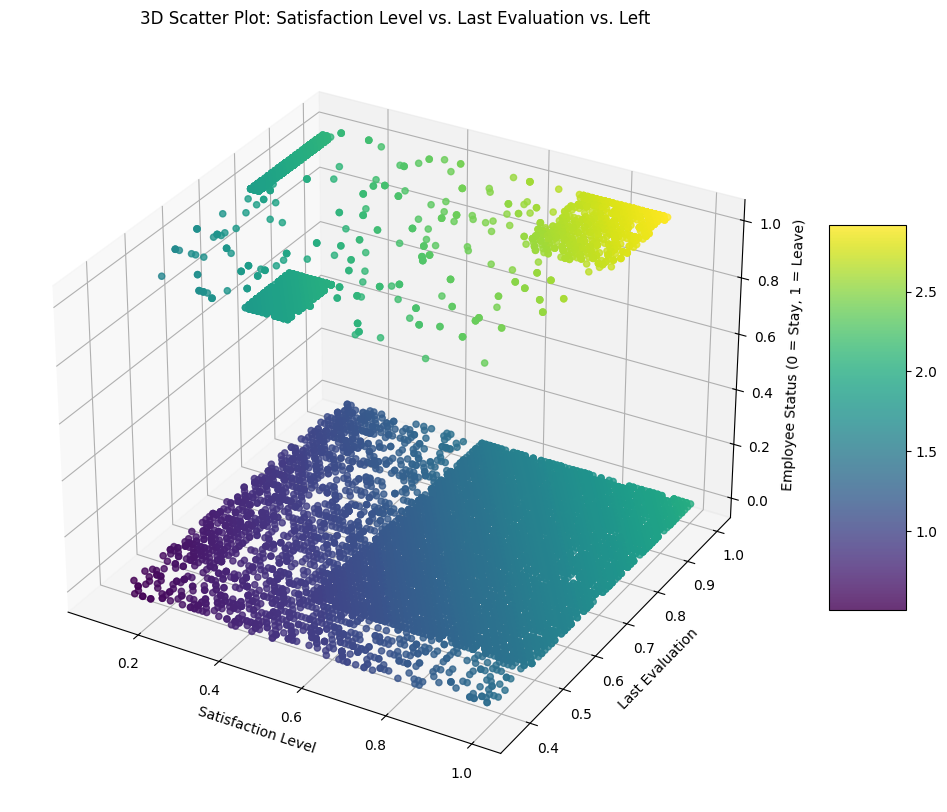

In [11]:
# Scatter plot of satisfaction_level, time_spend_company, and left
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    data['satisfaction_level'], 
    data['last_evaluation'], 
    data['left'], 
    alpha=0.8,
    c=(data['satisfaction_level']+data['last_evaluation']+data['left']), marker='o'
) 

ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.3, alpha=0.2)

ax.set_xlabel('Satisfaction Level')
ax.set_ylabel('Last Evaluation')
ax.set_zlabel('Employee Status (0 = Stay, 1 = Leave)')

plt.tight_layout()

plt.title('3D Scatter Plot: Satisfaction Level vs. Last Evaluation vs. Left')
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
plt.show()

In [5]:
# Data preprocessing

# Ordinal Encoding for salary
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
data['salary'] = ordinal_encoder.fit_transform(data[['salary']])

# Target Encoding for department
department_target_mean = data.groupby('Departments')['left'].mean()
data['Departments_encoded'] = data['Departments'].map(department_target_mean)

# Drop the original column to avoid duplication
data.drop(columns=['Departments'], inplace=True)


In [6]:
print(department_target_mean)


Departments
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64


In [9]:
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected features
data_scaled = data.copy()
data_scaled[continuous_features] = scaler.fit_transform(data[continuous_features])

print(data_scaled.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681         0.265625               2              0.285047   
1            0.780220         0.781250               5              0.775701   
2            0.021978         0.812500               7              0.822430   
3            0.692308         0.796875               5              0.593458   
4            0.307692         0.250000               2              0.294393   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     0.0   
1                   6              0     1                      0     1.0   
2                   4              0     1                      0     1.0   
3                   5              0     1                      0     0.0   
4                   3              0     1                      0     0.0   

   Departments_encoded  
0             0.244928  
1     

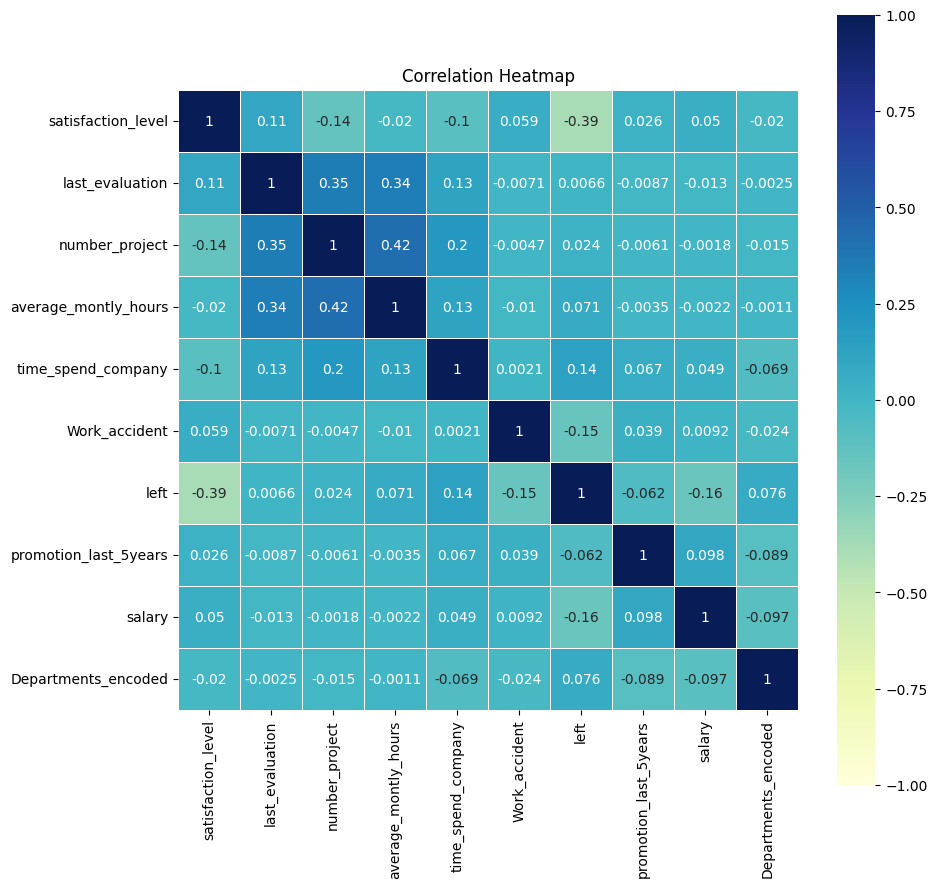

In [15]:
# Correlation Heatmap
correlation = data_scaled.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, vmin=-1, square=True, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

Model Development

In [45]:

X = data.drop(columns=['left'])
y = data['left']

# Initialize dictionary to store accuracies for different splits
split_accuracies = {}

# Define the splitting percentages and their corresponding test sizes
splits = {
    "90:10": 0.1,
    "80:20": 0.2,
    "70:30": 0.3,
    "60:40": 0.4
}

# Loop through the splits
for split_name, test_size in splits.items():
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Create the model
    clf = MLPClassifier(
        hidden_layer_sizes=(8, 5),
        max_iter=2000,
        activation='relu',
        solver='adam',
        random_state=5,
        tol=0.001,
        momentum=0.9,
        verbose=False,
        learning_rate_init=0.01,
        early_stopping=False,
        n_iter_no_change=500,
    )

    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy
    split_accuracies[split_name] = accuracy

# Print the results
for split_name, accuracy in split_accuracies.items():
    print(f"Train-Test Split {split_name}: Accuracy = {accuracy * 100:.4f}%")

Train-Test Split 90:10: Accuracy = 77.00%
Train-Test Split 80:20: Accuracy = 91.43%
Train-Test Split 70:30: Accuracy = 76.18%
Train-Test Split 60:40: Accuracy = 92.95%


In [10]:
# Split dataset into training set and testing set
X = data.drop(columns=['left'])
y = data['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create model object for a neural network classifier 
clf_base = MLPClassifier(
    hidden_layer_sizes=(8, 5), # Two hidden layers with 8 and 5 neurons
    max_iter=2000,             # Maximum number of iterations
    activation='relu',         # ReLU activation function
    solver='adam',             # Adam optimizer
    random_state=5,            # Random seed for reproducibility
    tol=0.001,                 # Convergence tolerance
    momentum=0.9,              # Momentum for gradient updates
    verbose=True,              # Enable training output
    learning_rate_init=0.01,   # Initial learning rate
    early_stopping=False,      # Disable early stopping
    n_iter_no_change=500,      # Number of iterations without improvement for early stopping
)

# Train the model
clf_base.fit(X_train, y_train)

# Predict on the test set
y_pred_base = clf_base.predict(X_test)

Iteration 1, loss = 3.45868747
Iteration 2, loss = 0.55927016
Iteration 3, loss = 0.54157449
Iteration 4, loss = 0.50191337
Iteration 5, loss = 0.46733259
Iteration 6, loss = 0.45046761
Iteration 7, loss = 0.41235642
Iteration 8, loss = 0.38718992
Iteration 9, loss = 0.39335357
Iteration 10, loss = 0.36563311
Iteration 11, loss = 0.35736731
Iteration 12, loss = 0.35824943
Iteration 13, loss = 0.35528201
Iteration 14, loss = 0.35393606
Iteration 15, loss = 0.36596042
Iteration 16, loss = 0.35625620
Iteration 17, loss = 0.35397617
Iteration 18, loss = 0.35009287
Iteration 19, loss = 0.35630804
Iteration 20, loss = 0.35455105
Iteration 21, loss = 0.35312113
Iteration 22, loss = 0.35200302
Iteration 23, loss = 0.35259734
Iteration 24, loss = 0.35079023
Iteration 25, loss = 0.35024534
Iteration 26, loss = 0.35206470
Iteration 27, loss = 0.35463379
Iteration 28, loss = 0.35355153
Iteration 29, loss = 0.35886829
Iteration 30, loss = 0.35517355
Iteration 31, loss = 0.35387411
Iteration 32, los

In [18]:
# Evaluate the model
print("---------- Baseline MLPClassifier Performance ----------")
print("\nAccuracy: %.3f%%" %(accuracy_score(y_test, y_pred_base)*100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_base))
print("\nClassification Report:\n", classification_report(y_test, y_pred_base))

---------- Baseline MLPClassifier Performance ----------

Accuracy: 91.433%

Confusion Matrix:
 [[2143  151]
 [ 106  600]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2294
           1       0.80      0.85      0.82       706

    accuracy                           0.91      3000
   macro avg       0.88      0.89      0.88      3000
weighted avg       0.92      0.91      0.92      3000



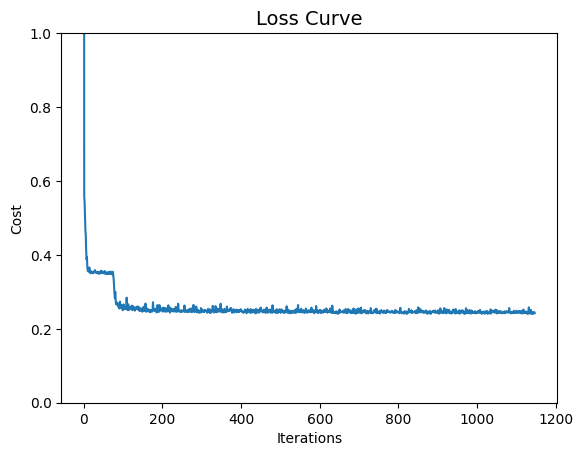

In [19]:
#plotting the error / loss curve
plt.plot(clf_base.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Add the hyperparameter-tuned model to the classifiers list
classifiers = {
    "Baseline with 90:10": clf_base1,
    "Baseline with 80:20": clf_base,
    "Baseline with 70:30": clf_base3,
    "Baseline with 60:40": clf_base4
}

# Loop through classifiers to calculate and print accuracy
for name, clf in classifiers.items():
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print(f"{name} Model: Training Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")


In [20]:
# Create model object for a neural network classifier 
clf1 = MLPClassifier(
    hidden_layer_sizes=(5, 2),
    max_iter=500,             
    activation='relu',        
    solver='adam',            
    random_state=5,           
    tol=0.01,                 
    momentum=0.5,             
    verbose=True,             
    learning_rate_init=0.1,   
    early_stopping=False,      
    n_iter_no_change=500,      
)

# Train the model
clf1.fit(X_train, y_train)

# Predict on the test set
y_pred1 = clf1.predict(X_test)

Iteration 1, loss = 1.21947761
Iteration 2, loss = 0.54975084
Iteration 3, loss = 0.54971048
Iteration 4, loss = 0.54985218
Iteration 5, loss = 0.54967117
Iteration 6, loss = 0.55023573
Iteration 7, loss = 0.55019064
Iteration 8, loss = 0.54986053
Iteration 9, loss = 0.55004211
Iteration 10, loss = 0.54995672
Iteration 11, loss = 0.54987698
Iteration 12, loss = 0.54999233
Iteration 13, loss = 0.55014210
Iteration 14, loss = 0.55049762
Iteration 15, loss = 0.54990598
Iteration 16, loss = 0.55041804
Iteration 17, loss = 0.55004439
Iteration 18, loss = 0.55040373
Iteration 19, loss = 0.55017849
Iteration 20, loss = 0.55013432
Iteration 21, loss = 0.54999521
Iteration 22, loss = 0.55014232
Iteration 23, loss = 0.55045848
Iteration 24, loss = 0.55010382
Iteration 25, loss = 0.54992791
Iteration 26, loss = 0.54995213
Iteration 27, loss = 0.55013595
Iteration 28, loss = 0.55012108
Iteration 29, loss = 0.54991355
Iteration 30, loss = 0.55009038
Iteration 31, loss = 0.55071930
Iteration 32, los

c:\Users\Huawei MateBook D15\PycharmProjects\HelloWorld\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Evaluate the model
print("---------- Model 1 MLPClassifier Performance ----------")
print("\nAccuracy: %.3f%%" %(accuracy_score(y_test, y_pred1)*100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))

---------- Model 1 MLPClassifier Performance ----------

Accuracy: 76.467%

Confusion Matrix:
 [[2294    0]
 [ 706    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      2294
           1       0.00      0.00      0.00       706

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



c:\Users\Huawei MateBook D15\PycharmProjects\HelloWorld\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Huawei MateBook D15\PycharmProjects\HelloWorld\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Huawei MateBook D15\PycharmProjects\HelloWorld\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

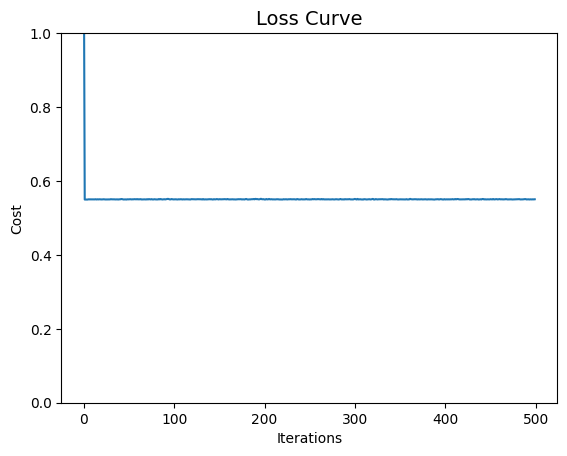

In [22]:
#plotting the error / loss curve
plt.plot(clf1.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [23]:
# Create model object for a neural network classifier 
clf2 = MLPClassifier(
    hidden_layer_sizes=(12, 6),
    max_iter=2500,             
    activation='relu',        
    solver='adam',            
    random_state=5,           
    tol=0.0001,                 
    momentum=0.9,             
    verbose=True,             
    learning_rate_init=0.001,  
    early_stopping=False,      
    n_iter_no_change=500,      
)

# Train the model
clf2.fit(X_train, y_train)

# Predict on the test set
y_pred2 = clf2.predict(X_test)

Iteration 1, loss = 7.93044912
Iteration 2, loss = 1.69942135
Iteration 3, loss = 0.55565176
Iteration 4, loss = 0.55041724
Iteration 5, loss = 0.54548674
Iteration 6, loss = 0.54113284
Iteration 7, loss = 0.53861094
Iteration 8, loss = 0.53509826
Iteration 9, loss = 0.52957791
Iteration 10, loss = 0.52673884
Iteration 11, loss = 0.52546838
Iteration 12, loss = 0.52310137
Iteration 13, loss = 0.51960193
Iteration 14, loss = 0.51822038
Iteration 15, loss = 0.51692912
Iteration 16, loss = 0.51521984
Iteration 17, loss = 0.51318740
Iteration 18, loss = 0.51130878
Iteration 19, loss = 0.51042489
Iteration 20, loss = 0.50849300
Iteration 21, loss = 0.50859539
Iteration 22, loss = 0.50936399
Iteration 23, loss = 0.50665747
Iteration 24, loss = 0.50309743
Iteration 25, loss = 0.50345606
Iteration 26, loss = 0.50179943
Iteration 27, loss = 0.49954820
Iteration 28, loss = 0.49814812
Iteration 29, loss = 0.49505968
Iteration 30, loss = 0.49251762
Iteration 31, loss = 0.49063449
Iteration 32, los

In [24]:
# Evaluate the model
print("---------- Model 2 MLPClassifier Performance ----------")
print("\nAccuracy: %.3f%%" %(accuracy_score(y_test, y_pred2)*100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

---------- Model 2 MLPClassifier Performance ----------

Accuracy: 95.100%

Confusion Matrix:
 [[2232   62]
 [  85  621]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2294
           1       0.91      0.88      0.89       706

    accuracy                           0.95      3000
   macro avg       0.94      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



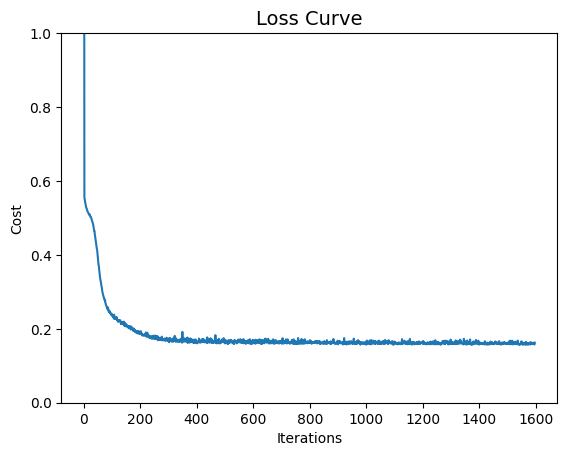

In [25]:
#plotting the error / loss curve
plt.plot(clf2.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [26]:
# Create model object for a neural network classifier 
clf3 = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    max_iter=1500,             
    activation='relu',        
    solver='adam',            
    random_state=5,           
    tol=0.0005,                 
    momentum=0.8,             
    verbose=True,             
    learning_rate_init=0.005,  
    early_stopping=False,      
    n_iter_no_change=500,      
)

# Train the model
clf3.fit(X_train, y_train)

# Predict on the test set
y_pred3 = clf3.predict(X_test)

Iteration 1, loss = 2.65708414
Iteration 2, loss = 0.61237764
Iteration 3, loss = 0.55140193
Iteration 4, loss = 0.52869521
Iteration 5, loss = 0.51027279
Iteration 6, loss = 0.49852701
Iteration 7, loss = 0.48943056
Iteration 8, loss = 0.47368240
Iteration 9, loss = 0.47747336
Iteration 10, loss = 0.46252956
Iteration 11, loss = 0.45117574
Iteration 12, loss = 0.45108767
Iteration 13, loss = 0.44562465
Iteration 14, loss = 0.44923909
Iteration 15, loss = 0.44926544
Iteration 16, loss = 0.44924327
Iteration 17, loss = 0.44652568
Iteration 18, loss = 0.44999971
Iteration 19, loss = 0.45057324
Iteration 20, loss = 0.44664686
Iteration 21, loss = 0.45191269
Iteration 22, loss = 0.46697682
Iteration 23, loss = 0.45938296
Iteration 24, loss = 0.46913342
Iteration 25, loss = 0.44180892
Iteration 26, loss = 0.45167816
Iteration 27, loss = 0.44026303
Iteration 28, loss = 0.44256400
Iteration 29, loss = 0.44361996
Iteration 30, loss = 0.44482715
Iteration 31, loss = 0.44966336
Iteration 32, los

c:\Users\Huawei MateBook D15\PycharmProjects\HelloWorld\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
# Evaluate the model
print("---------- Model 3 MLPClassifier Performance ----------")
print("\nAccuracy:  %.3f%%" %(accuracy_score(y_test, y_pred3)*100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))

---------- Model 3 MLPClassifier Performance ----------

Accuracy:  96.333%

Confusion Matrix:
 [[2258   36]
 [  74  632]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2294
           1       0.95      0.90      0.92       706

    accuracy                           0.96      3000
   macro avg       0.96      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



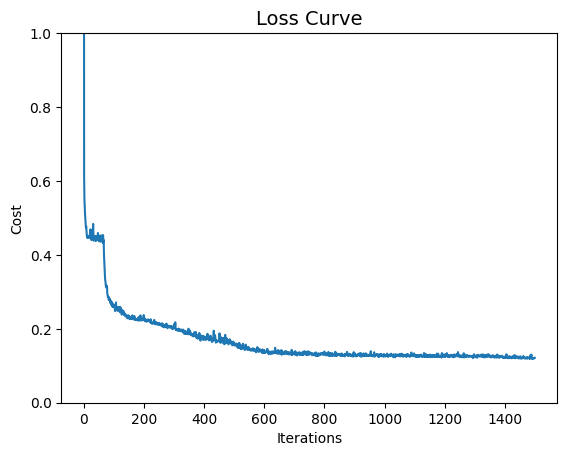

In [28]:
#plotting the error / loss curve
plt.plot(clf3.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Model Development Through Hyperparameter Tuning

In [29]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'alpha': [0.001, 0.01, 0.1],                              # Regularization strength
    'max_iter': [100, 500, 1000],                             # Maximum number of iterations
    'learning_rate': ['constant', 'adaptive']                 # Learning rate schedule
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=clf_base, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
Iteration 1, loss = 2.50307888
Iteration 2, loss = 0.53989805
Iteration 3, loss = 0.54331446
Iteration 4, loss = 0.49646982
Iteration 5, loss = 0.46336749
Iteration 6, loss = 0.46838278
Iteration 7, loss = 0.40493605
Iteration 8, loss = 0.37088686
Iteration 9, loss = 0.34267476
Iteration 10, loss = 0.34567005
Iteration 11, loss = 0.33432461
Iteration 12, loss = 0.33909807
Iteration 13, loss = 0.33274408
Iteration 14, loss = 0.29892669
Iteration 15, loss = 0.30299051
Iteration 16, loss = 0.29739573
Iteration 17, loss = 0.28081237
Iteration 18, loss = 0.30320637
Iteration 19, loss = 0.28425519
Iteration 20, loss = 0.28107934
Iteration 21, loss = 0.27650269
Iteration 22, loss = 0.26295165
Iteration 23, loss = 0.29440474
Iteration 24, loss = 0.27208602
Iteration 25, loss = 0.27123080
Iteration 26, loss = 0.26929806
Iteration 27, loss = 0.26096248
Iteration 28, loss = 0.25658970
Iteration 29, loss = 0.26184908
Iteration 30, loss 

c:\Users\Huawei MateBook D15\PycharmProjects\HelloWorld\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
# Predictions using the hyperparameter-tuned model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

# Evaluate the hyperparameter-tuned model
print("----- Hyperparameter-Tuned MLPClassifier Performance -----")
print("\nAccuracy:  %.3f%%" % (accuracy_score(y_test, y_pred_tuned) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

----- Hyperparameter-Tuned MLPClassifier Performance -----

Accuracy:  95.967%

Confusion Matrix:
 [[2249   45]
 [  76  630]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2294
           1       0.93      0.89      0.91       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



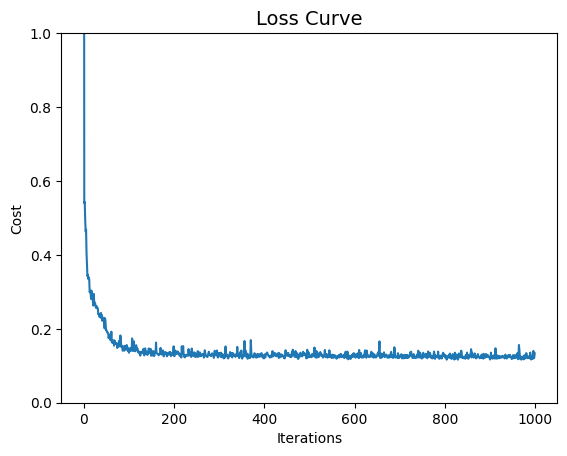

In [31]:
best_model = grid_search.best_estimator_
#plotting the error / loss curve
plt.plot(best_model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Comparison

In [32]:
# Add the hyperparameter-tuned model to the classifiers list
classifiers = {
    "Baseline": clf_base,
    "Setting 1": clf1,
    "Setting 2": clf2,
    "Setting 3": clf3,
    "Hyperparameter Tuning": grid_search.best_estimator_
}

# Loop through classifiers to calculate and print accuracy
for name, clf in classifiers.items():
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print(f"{name} Model: Training Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")


Baseline Model: Training Accuracy = 0.9136, Test Accuracy = 0.9143
Setting 1 Model: Training Accuracy = 0.7612, Test Accuracy = 0.7647
Setting 2 Model: Training Accuracy = 0.9536, Test Accuracy = 0.9510
Setting 3 Model: Training Accuracy = 0.9672, Test Accuracy = 0.9633
Hyperparameter Tuning Model: Training Accuracy = 0.9658, Test Accuracy = 0.9597


With Feature Scaling

In [11]:
# Split dataset into training set and testing set
X_scaled = data_scaled.drop(columns=['left'])
y_scaled = data_scaled['left']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [12]:
# Create model object for a neural network classifier 
clf_base = MLPClassifier(
    hidden_layer_sizes=(8, 5), # Two hidden layers with 8 and 5 neurons
    max_iter=2000,             # Maximum number of iterations
    activation='relu',         # ReLU activation function
    solver='adam',             # Adam optimizer
    random_state=5,            # Random seed for reproducibility
    tol=0.001,                 # Convergence tolerance
    momentum=0.9,              # Momentum for gradient updates
    verbose=True,              # Enable training output
    learning_rate_init=0.01,   # Initial learning rate
    early_stopping=False,      # Disable early stopping
    n_iter_no_change=500,      # Number of iterations without improvement for early stopping
)

# Train the model
clf_base.fit(X_train, y_train)

# Predict on the test set
y_pred_base = clf_base.predict(X_test)

Iteration 1, loss = 0.49353784
Iteration 2, loss = 0.31312046
Iteration 3, loss = 0.23932932
Iteration 4, loss = 0.21922565
Iteration 5, loss = 0.20220149
Iteration 6, loss = 0.18961816
Iteration 7, loss = 0.17794837
Iteration 8, loss = 0.16541625
Iteration 9, loss = 0.16002099
Iteration 10, loss = 0.15355107
Iteration 11, loss = 0.14883928
Iteration 12, loss = 0.14943853
Iteration 13, loss = 0.14050118
Iteration 14, loss = 0.13807315
Iteration 15, loss = 0.13962331
Iteration 16, loss = 0.13707413
Iteration 17, loss = 0.13722049
Iteration 18, loss = 0.13347430
Iteration 19, loss = 0.13526197
Iteration 20, loss = 0.13132819
Iteration 21, loss = 0.13218040
Iteration 22, loss = 0.13621796
Iteration 23, loss = 0.13258706
Iteration 24, loss = 0.12898444
Iteration 25, loss = 0.12788251
Iteration 26, loss = 0.12785616
Iteration 27, loss = 0.12649188
Iteration 28, loss = 0.12750961
Iteration 29, loss = 0.13047067
Iteration 30, loss = 0.12844327
Iteration 31, loss = 0.12818838
Iteration 32, los

In [13]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'alpha': [0.001, 0.01, 0.1],                              # Regularization strength
    'max_iter': [100, 500, 1000],                             # Maximum number of iterations
    'learning_rate': ['constant', 'adaptive']                 # Learning rate schedule
}

# Set up GridSearchCV
grid_search_scale = GridSearchCV(estimator=clf_base, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search_scale.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search_scale.best_params_)
print("Best Cross-Validation Score:", grid_search_scale.best_score_)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
Iteration 1, loss = 0.34658870
Iteration 2, loss = 0.21561200
Iteration 3, loss = 0.17374285
Iteration 4, loss = 0.16374570
Iteration 5, loss = 0.14255955
Iteration 6, loss = 0.13667581
Iteration 7, loss = 0.13213631
Iteration 8, loss = 0.12799432
Iteration 9, loss = 0.12887270
Iteration 10, loss = 0.12099647
Iteration 11, loss = 0.11782969
Iteration 12, loss = 0.11507205
Iteration 13, loss = 0.12031692
Iteration 14, loss = 0.11717395
Iteration 15, loss = 0.11501562
Iteration 16, loss = 0.11505617
Iteration 17, loss = 0.11348010
Iteration 18, loss = 0.12153468
Iteration 19, loss = 0.11378943
Iteration 20, loss = 0.11132184
Iteration 21, loss = 0.10999900
Iteration 22, loss = 0.10128398
Iteration 23, loss = 0.10277565
Iteration 24, loss = 0.11146597
Iteration 25, loss = 0.10304564
Iteration 26, loss = 0.10182938
Iteration 27, loss = 0.10516449
Iteration 28, loss = 0.10588604
Iteration 29, loss = 0.10031278
Iteration 30, loss 

c:\Users\Huawei MateBook D15\PycharmProjects\HelloWorld\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# Predictions using the hyperparameter-tuned model
y_pred_tuned_scale = grid_search_scale.best_estimator_.predict(X_test)

# Evaluate the hyperparameter-tuned model
print("---------- Hyperparameter-Tuned MLPClassifier Performance ----------")
print("\nAccuracy:  %.3f%%" % (accuracy_score(y_test, y_pred_tuned_scale) * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_scale))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned_scale))

---------- Hyperparameter-Tuned MLPClassifier Performance ----------

Accuracy:  97.700%

Confusion Matrix:
 [[2270   24]
 [  45  661]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2294
           1       0.96      0.94      0.95       706

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



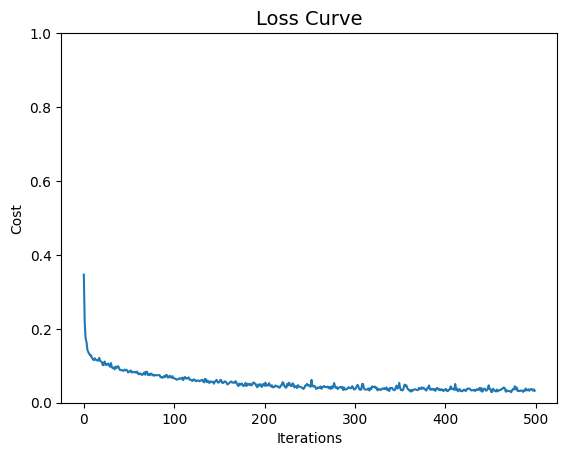

In [15]:
best_model = grid_search_scale.best_estimator_
#plotting the error / loss curve
plt.plot(best_model.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.ylim(0,1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [16]:
train_accuracy = grid_search_scale.score(X_train, y_train)
test_accuracy = grid_search_scale.score(X_test, y_test)
    
print(f"Hyperparameter Tuning with MinMaxScalar Model: Training Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

Hyperparameter Tuning with MinMaxScalar Model: Training Accuracy = 0.9899, Test Accuracy = 0.9770


Working Application

In [17]:
import joblib
# Save the scaler for deployment
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")

# # Save the trained model
# joblib.dump(clf_base, 'model.pkl')
# print("Model saved as model.pkl")

# Save the hyperparameter-tuned model
joblib.dump(grid_search_scale.best_estimator_, 'model.pkl')
print("Tuned Model saved as model.pkl")
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')
print("Test data saved!")

Scaler saved as scaler.pkl
Tuned Model saved as model.pkl
Test data saved!


In [43]:
import joblib

# Save the hyperparameter-tuned model
joblib.dump(grid_search_scale.best_estimator_, 'model.pkl')
print("Model saved as model.pkl")
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_test, 'y_test.pkl')
print("Test data saved!")

Model saved as model.pkl
Test data saved!


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # During training
joblib.dump(scaler, 'scaler.pkl')   # Save the scaler


NameError: name 'X' is not defined